# Домашнее задание 3

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 24 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_3

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Вновь рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i).
\end{equation}

В прошлом задании работа шла с линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$. 

__(а)__ В дополнение к квадратичной функции потерь реализуйте логистическую/сигмоидную: $l(z,y) = \ln (1 + \exp(-yz))$ __(Важно: $y$ должен принимать значения $-1$ или $1$ )__. Выпишите градиент. Является ли новая задача регресии выпуклой? Оцените $L$ для новой функции потерь. 

\begin{equation}
f(w) = \frac{1}{n} \sum\limits_{i=1}^n \ln(1 + \exp(-y_i \cdot (w^Tx_i)) ).
\end{equation}

\begin{equation}
grad f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{(- y_i \cdot x_i)\exp(-y_i \cdot (w^Tx_i))}{1 + \exp(-y_i \cdot (w^Tx_i))}
\end{equation}

\begin{equation}
grad f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{- y_i \cdot x_i}{1 + \exp(y_i \cdot (w^Tx_i))}
\end{equation}

\begin{equation}
hessian f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{y_i^2 \cdot x_i x_i^T}{(1 + \exp(y_i \cdot (w^Tx_i)))^2}
\end{equation}

__(б)__ Возьмите датасет _mushrooms_ из прошлого задания. Проделайте следующие шаги из прошлого задания, только с логистической функцией потерь:

1) Разделите данные на две части: обучающую и тестовую.

2) Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации.

3) Используя градиентный спуск, обучите новую модель (без ограничений и регуляризаций). Постройте график: точность от номера итерации.

4) Если в пункте 3) пришлось столкнуться с проблемами или просто необходимо улучшить точность, то добавьте ограничения или $\ell_2$-регуляризацию, как в прошлом ДЗ.

5) Сравните с результатами квадратичной функции потерь из прошлого ДЗ.

In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [3]:
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
print(X.shape, y.shape)

(8124, 112) (8124,)


In [4]:
y = y*2 - 3
print(y)

[-1.  1.  1. ...  1. -1.  1.]


## 1.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2.

In [6]:
hessian = np.zeros((d, d))

#for a, b in zip(X_train[:], y_train):
    #hessian = hessian + 1/n * b * b * np.outer(a, a) * 1/(1 + np.exp(b * )) ** 2

## 3.

In [26]:
from importlib import reload
import HW_3
reload(HW_3)
from HW_3 import MyLogisticRegression

In [9]:
step = 100
iter = 10e3
eps = 5*10e-4
linear_model = MyLogisticRegression()
linear_model.fit(X_train, y_train, iter=iter, eps=eps, step=step)

Text(0, 0.5, 'Логарифм ошибки')

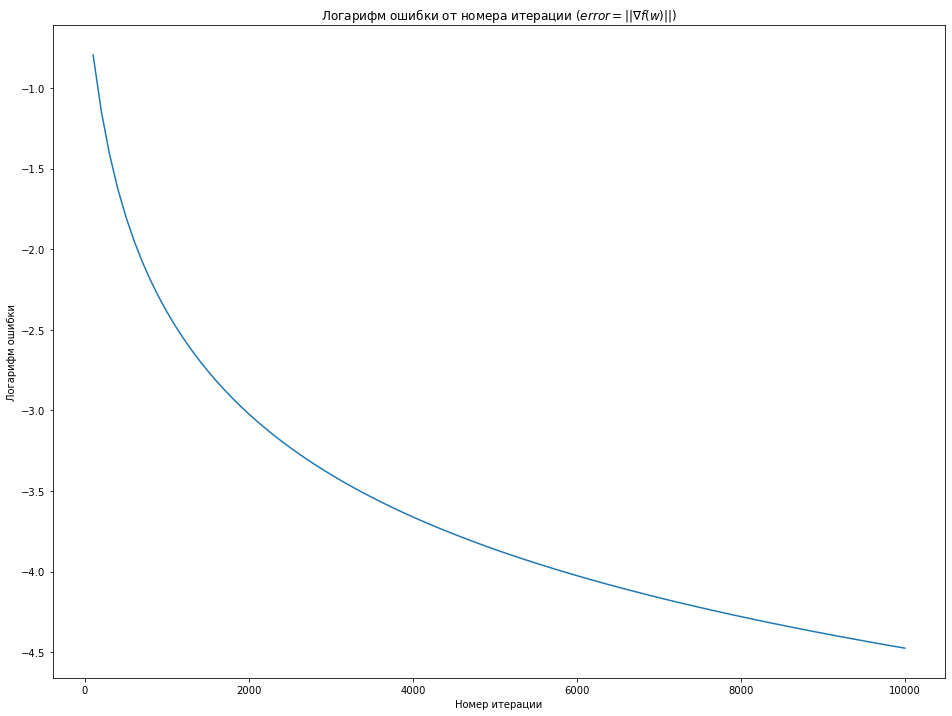

In [10]:
fig, ax = plt.subplots(figsize=(16,12))
y = np.array(linear_model.get_errors())
x = np.linspace(step, step * len(y), len(y))

ax.set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) ||$)")
ax.plot(x, np.log(y))

ax.set_xlabel("Номер итерации")
ax.set_ylabel("Логарифм ошибки")

Text(0, 0.5, 'Точность')

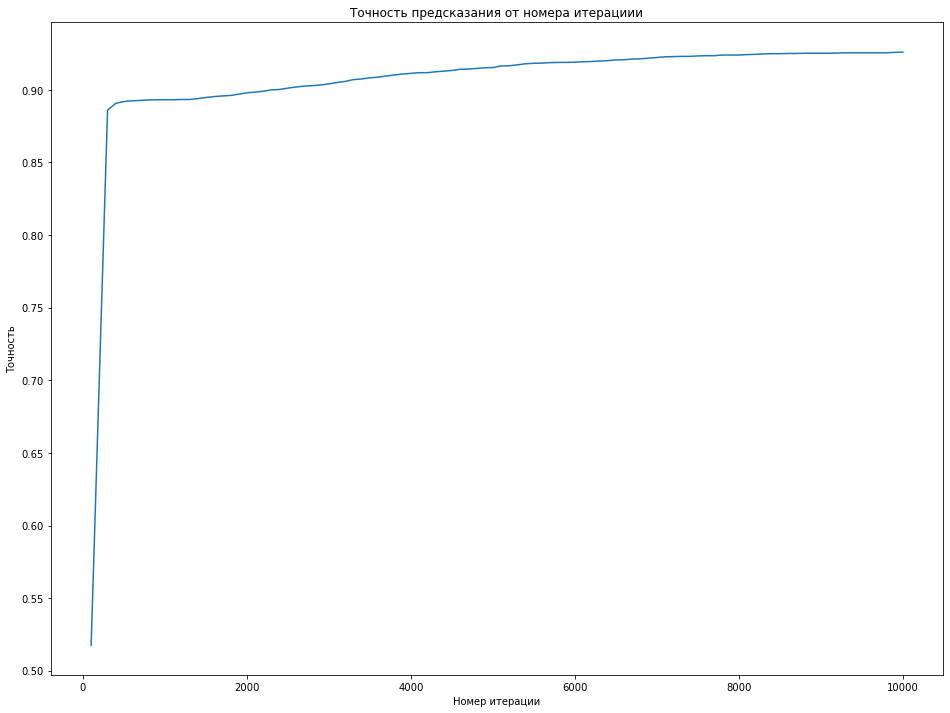

In [11]:
fig, ax = plt.subplots(figsize=(16,12))

y = np.array(linear_model.get_accuracy())
x = np.linspace(step, step*len(y), len(y))

ax.set_title("Точность предсказания от номера итерациии")
ax.plot(x, y)

ax.set_xlabel("Номер итерации")
ax.set_ylabel("Точность")

## 4.

4) Если в пункте 3) пришлось столкнуться с проблемами или просто необходимо улучшить точность, то добавьте ограничения или $\ell_2$-регуляризацию, как в прошлом ДЗ.

5) Сравните с результатами квадратичной функции потерь из прошлого ДЗ.

In [28]:
step = 50
iter = 10e4
eps = 5*10e-4
alpha = 0.1
linear_model_l2 = MyLogisticRegression()
linear_model_l2.fit(X_train, y_train, eps=eps, iter=10e4, l2=True, step=step, alpha=alpha)

Text(0, 0.5, 'Логарифм ошибки')

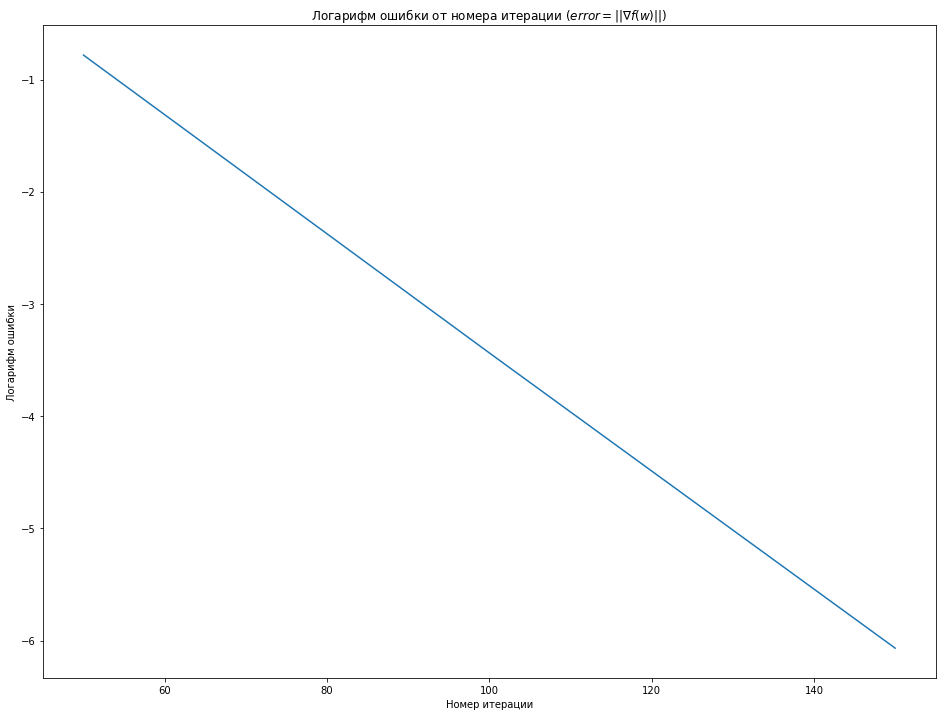

In [29]:
fig, ax = plt.subplots(figsize=(16,12))

y = np.array(linear_model_l2.get_errors())
x = np.linspace(step, step*len(y), len(y))

ax.set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) ||$)")
ax.plot(x, np.log(y))

ax.set_xlabel("Номер итерации")
ax.set_ylabel("Логарифм ошибки")

Text(0, 0.5, 'Точность')

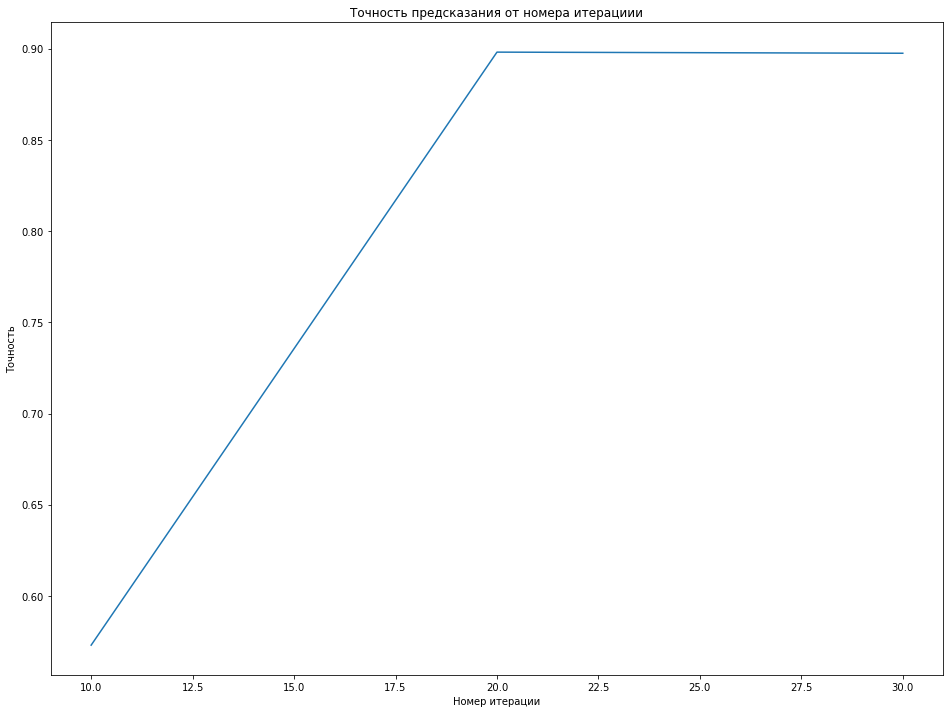

In [30]:
fig, ax = plt.subplots(figsize=(16,12))
y = np.array(linear_model_l2.get_accuracy())
x = np.linspace(10, 10*len(y), len(y))


ax.set_title("Точность предсказания от номера итерациии")
ax.plot(x, y)

ax.set_xlabel("Номер итерации")
ax.set_ylabel("Точность")

In [31]:
y_pred1 = linear_model.predict(X_test)
y_pred2 = linear_model_l2.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(accuracy_score(y_test, y_pred2))

0.9335384615384615
0.9015384615384615


h_ij = (hessian f)_ij
$$||h_{i,j}||_2 <= C \cdot ||h_{i, j}||_{str} <= C \cdot || abs(h_{i, j}) ||_{str} = C \cdot || abs(\text{sum ...}) ||_{str} = L$$ 

## 5.

In [ ]:
from importlib import reload
import HW_3
reload(HW_3)
from HW_3 import MyLinearRegression

In [ ]:
step = 1000
iter = 10e5
eps = 5*10e-4
linear_model_reg = MyLinearRegression()

linear_model_reg.fit(X_train, y_train, iter=iter, eps=eps, step=step)

Text(0, 0.5, 'Логарифм ошибки')

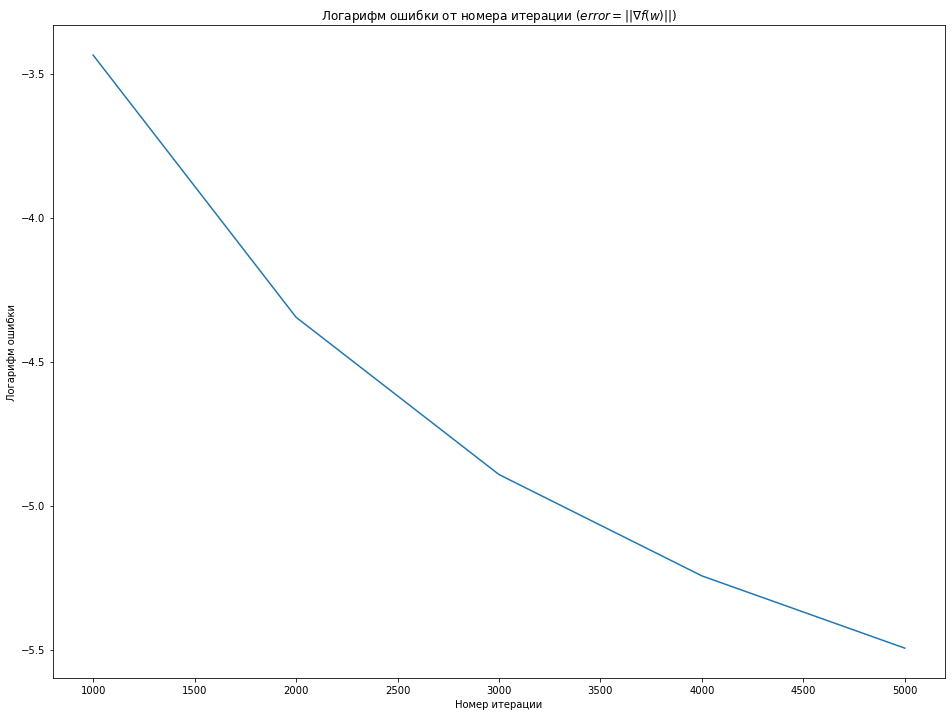

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
y = np.array(linear_model_reg.get_errors())
x = np.linspace(step, step*len(y), len(y))

ax.set_title("Логарифм ошибки от номера итерации ($error = || \\nabla f(w) ||$)")
ax.plot(x, np.log(y))

ax.set_xlabel("Номер итерации")
ax.set_ylabel("Логарифм ошибки")

Text(0, 0.5, 'Точность')

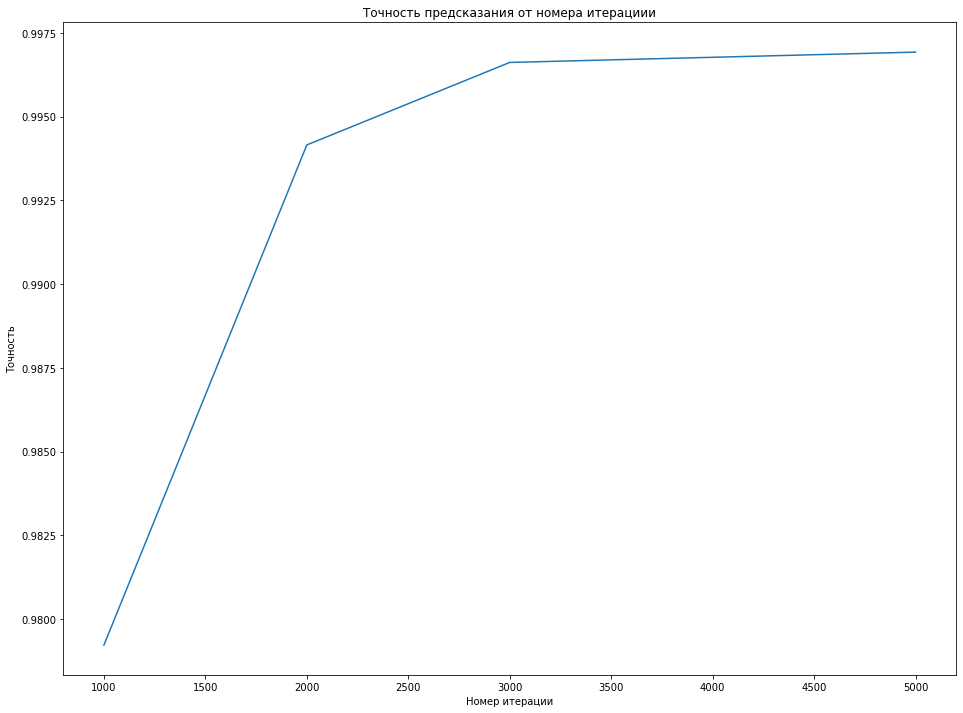

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
iter = int(10e4)

y = np.array(linear_model_reg.get_accuracies())
x = np.linspace(step, step*len(y), len(y))

ax.set_title("Точность предсказания от номера итерациии")
ax.plot(x, y)

ax.set_xlabel("Номер итерации")
ax.set_ylabel("Точность")

In [ ]:
print(accuracy_score(y_test, linear_model_reg.predict(X_test)))

0.9975384615384615


## Задача 2

__(a)__ Реализуйте метод тяжелого шарика. 

In [ ]:
#ответ

__(б)__ Решите задачу логистической регрессии с помощью метода тяжелого шарика (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

In [ ]:
#ответ

__(в)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте на этот же график сходимость градиентного спуска с шагом $\frac{1}{L}$. Сделайте вывод.

In [ ]:
#ответ

__(г)__ Если в пунктах (б) и (в) столкнулись с проблемами, попробуйте $\ell_2$-регуляризовать задачу или рассмотреть ее на ограниченном множестве.

In [ ]:
#ответ

__(д)__ Реализуйте ускоренный метод Нестерова (в форме Нестерова, а не который доказывали на семинаре). 

In [ ]:
#ответ

__(е)__ Решите задачу логистической регресии с помощью метода Нестерова (не забудьте разделить выборку на две части: обучающую и тестовую). Зафиксируйте шаг $\frac{1}{L}$ и перебирайте разные значения моментума от -1 до 1. Проверьте также значения моментума равные $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ - номер итерации), а если решаете сильно выпуклую задачу, то и $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно) для различных значений моментума. Всегда ли сходимость является монотонной?

In [ ]:
#ответ

__(ж)__ Для лучшего значения моментума постройте график зависимости точности модели на тестовой выборке от времени работы метода. Добавьте этот график к графикам для тяжелого шарика и градиентного спуска из пункта (г). Сделайте итоговый вывод.

In [ ]:
#ответ

__Бонусные пункт__

__(з)__ Сделаем подбор константы $L$ адаптивным. Как упоминалось на семинаре, можно измерять локальную $L$, используя:
$$
f(y) \leq f(x^k) + \langle \nabla f(x^k), y - x^k \rangle + \frac{L}{2}\|x^k - y\|_2^2
$$
В частности, может подойти процедура:

```python
def backtracking_L(f, grad, x, h, L0, rho):
    L = L0
    fx = f(x)
    gradx = grad(x)
    while True:
        y = x - 1 / L * h
        if f(y) <= fx - 1 / L gradx.dot(h) + 1 / (2 * L) h.dot(h):
            break
        else:
            L = L * rho
    return L
```

Каким стоит взять __h__? __rho__ должно быть больше или меньше 1? __L0__ надо брать заведомо большим или маленьким?

In [ ]:
#ответ

__(и)__ Поэксперементируйте с этой процедурой, встроенной в подбор $L$ для шага градиентного спуска. В качестве задачи продолжайте рассматривать логистическую регрессию из Задачи 1. Аналогично встройте процедуру подбора $L$ в метод тяжелого шарика и ускоренный метод Нестерова. Постройте график сходимости метода от числа итераций (критерий сходимости подберите самостоятельно). Отобразите на этом графике градиентный спуск, тяжелый шарик и метод Нестерова с адаптивным шагом и шагом $\frac{1}{L}$ (всего 6 линий на графике). Сделайте вывод.

In [ ]:
#ответ

__(к)__ Постройте аналогичный пункту (и) график точности модели от времени.

In [ ]:
#ответ

__(л)__ В [работе](https://arxiv.org/pdf/1204.3982.pdf) представлена техника рестартов для подавления немонотонной сходимости Алгоритма 2 (метод Нестерова). Попробуйте повторить эксперименты авторов на $\ell_2$-регуляризованной квадратичной или логистической регресии. Возьмите параметр регуляризации $\lambda = L / 100$.

In [ ]:
#ответ